In [ ]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

df = pd.read_csv(list(uploaded.keys())[0])

df = df.iloc[:, 1:]

print("מספר שורות:", df.shape[0])
print("מספר עמודות:", df.shape[1])
df.head()


Saving CATEGORIZED_ICD_TABLE_BY_ELINOR.csv to CATEGORIZED_ICD_TABLE_BY_ELINOR.csv
מספר שורות: 367588
מספר עמודות: 21


,Category,51265,50882,51277,50893,51279,50960,51221,51222,50902,...,50971,50912,51301,50983,51248,51249,51250,50931,50868,51006
0,Diseases,169.0,24.0,18.7,8.7,4.30,1.5,38.8,12.1,106.0,...,4.5,3.0,6.6,139.0,28.1,31.1,90.0,70.0,14.0,14.0
1,Diseases,169.0,24.0,18.7,8.7,4.30,1.5,38.8,12.1,106.0,...,4.5,3.0,6.6,139.0,28.1,31.1,90.0,70.0,14.0,14.0
2,Cardiovascular Diseases,169.0,24.0,18.7,8.7,4.30,1.5,38.8,12.1,106.0,...,4.5,3.0,6.6,139.0,28.1,31.1,90.0,70.0,14.0,14.0
3,Cardiovascular Diseases,169.0,24.0,18.7,8.7,4.30,1.5,38.8,12.1,106.0,...,4.5,3.0,6.6,139.0,28.1,31.1,90.0,70.0,14.0,14.0
4,Cardiovascular Diseases,265.0,30.0,15.5,7.6,2.78,2.3,25.4,8.8,86.0,...,4.6,2.4,11.0,125.0,31.6,34.5,91.0,84.0,12.0,43.0


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

label_encoder = LabelEncoder()
df['Category'] = label_encoder.fit_transform(df['Category'])

df.fillna(df.mean(), inplace=True)

X = df.iloc[:, 1:]
y = df['Category']

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

num_classes = len(label_encoder.classes_)

model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(64, activation='relu'),
    layers.Dense(32, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │           2,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4)                   │             132 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 13,156 (51.39 KB)

 Trainable params: 13,156 (51.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train, epochs=50, batch_size=16, validation_data=(X_test, y_test))


Epoch 1/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.5631 - loss: 0.9490 - val_accuracy: 0.6201 - val_loss: 0.8539
Epoch 2/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.6317 - loss: 0.8314 - val_accuracy: 0.6596 - val_loss: 0.7848
Epoch 3/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 50s 3ms/step - accuracy: 0.6694 - loss: 0.7646 - val_accuracy: 0.6742 - val_loss: 0.7513
Epoch 4/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 76s 2ms/step - accuracy: 0.6862 - loss: 0.7296 - val_accuracy: 0.6907 - val_loss: 0.7227
Epoch 5/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 84s 3ms/step - accuracy: 0.6963 - loss: 0.7042 - val_accuracy: 0.6985 - val_loss: 0.7101
Epoch 6/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.7053 - loss: 0.6861 - val_accuracy: 0.7017 - val_loss: 0.6945
Epoch 7/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 49s 3ms/step - accuracy: 0.7119 - loss: 0.6735 - val_accuracy: 0.7069 - val_loss: 0.6916
Epoch 8/50
18380/18380 ━━━━━━━━━━━━━━━━━━━━ 45s 2ms/step - accuracy: 

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"דיוק המודל: {test_acc:.4f}")


2298/2298 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7357 - loss: 0.6242
דיוק המודל: 0.7345


2298/2298 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step


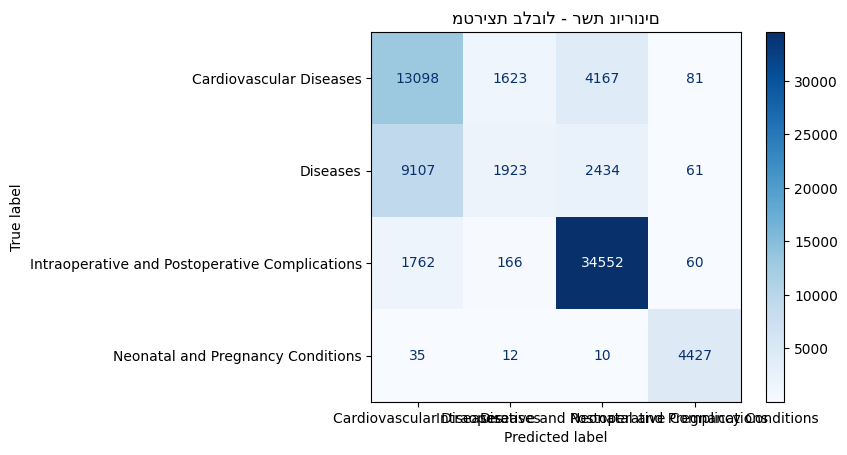

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

y_pred = np.argmax(model.predict(X_test), axis=1)

cm = confusion_matrix(y_test, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("מטריצת בלבול - רשת נוירונים")
plt.show()


In [ ]:
import tensorflow as tf

converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)


Saved artifact at '/tmp/tmp708oudvv'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  137367623069008: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137367623073424: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137367623073040: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137367623069584: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137367623073232: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137367623072464: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137367623070352: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137367623072848: TensorSpec(shape=(), dtype=tf.resource, name=None)


In [ ]:
from google.colab import files
files.download("model.tflite")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]  # הוספת אופטימיזציה
tflite_model = converter.convert()

with open("model.tflite", "wb") as f:
    f.write(tflite_model)

from google.colab import files
files.download("model.tflite")


Saved artifact at '/tmp/tmp2mzkf_jy'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 20), dtype=tf.float32, name='keras_tensor')
Output Type:
  TensorSpec(shape=(None, 4), dtype=tf.float32, name=None)
Captures:
  139799567494288: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139799567495440: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139799567491408: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139799567491216: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139799567496016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139799567491984: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139799567496400: TensorSpec(shape=(), dtype=tf.resource, name=None)
  139799567495248: TensorSpec(shape=(), dtype=tf.resource, name=None)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf

interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()

print("המודל נטען בהצלחה!")


המודל נטען בהצלחה!
